In [3]:
import pandas as pd
data=pd.read_csv(filepath_or_buffer=r'titanic-passengers.csv',sep=';')
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.dropna(axis=1,thresh=205,inplace=True)
data['Embarked'].fillna('S',inplace=True)

In [4]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [5]:
import re
def get_title(name):
    title=re.findall(r'\b[A-Z][a-z]+\.',name)
    return title[0]
data['Title'] = data['Name'].apply(get_title)
data['family_size'] = data['SibSp'] + data['Parch'] + 1

In [6]:
Title_Dictionary = {"Capt.":       "Officer",

                    "Col.":        "Officer",

                    "Major.":      "Officer",

                    "Dr.":         "Officer",

                    "Rev.":        "Officer",

                    "Jonkheer.":   "Royalty",

                    "Don.":        "Royalty",

                    "Sir." :       "Royalty",

                   "Lady." :      "Royalty",

                  "Countess.": "Royalty",

                    "Dona.":       "Royalty",

                    "Mme.":        "Miss",

                    "Mlle.":       "Miss",

                    "Miss." :      "Miss",

                    "Ms.":         "Mrs",

                    "Mr." :        "Mrs",

                    "Mrs." :       "Mrs",

                    "Master." :    "Master"

                    }

In [7]:
data['Title']=data['Title'].map(Title_Dictionary)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Survived']=encoder.fit_transform(data['Survived'])
data['Title']=encoder.fit_transform(data['Title'])
data['Embarked']=encoder.fit_transform(data['Embarked'])
sex_map= {
 'male': 0,
 'female': 1}
data['Sex'] = data['Sex'].map(sex_map)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

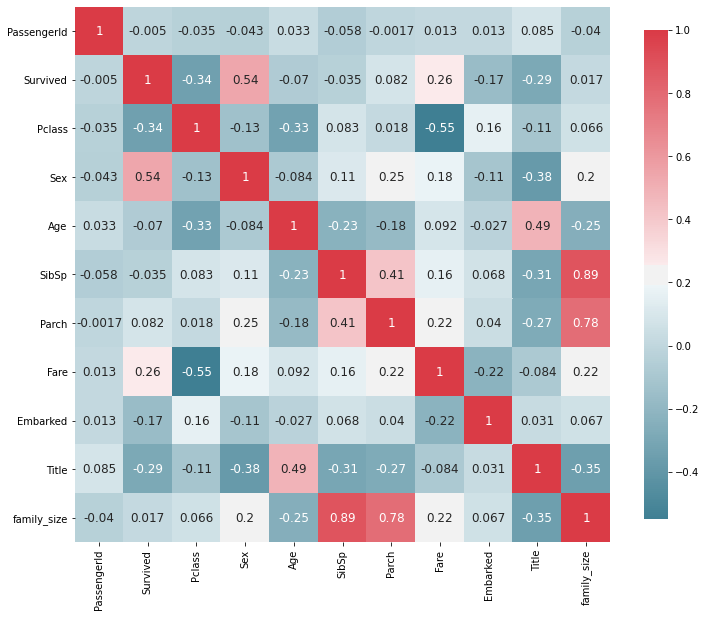

In [10]:
plot_correlation_map(data)

In [28]:
from sklearn.model_selection import train_test_split

X=data[["Pclass", "Title", "Sex", "Fare"]]
y=data["Survived"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=30)

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

DT_clf=DecisionTreeClassifier()
DT_clf.fit(X_train,y_train)
predicted=DT_clf.predict(X_test)
print("Accuracy = ", metrics.accuracy_score(y_test,predicted))


Accuracy =  0.8268156424581006


In [30]:
import graphviz
import sys
sys.path.append(r"C:\Program Files (x86)\Graphviz2.38\bin\dot")

dot_data=export_graphviz(DT_clf, out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph


ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'data'], make sure the Graphviz executables are on your systems' PATH

In [26]:
import graphviz
import sys
sys.path.append(r"C:\Program Files (x86)\Graphviz2.38\bin\dot")

dot_data=export_graphviz(DT_clf, out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'data'], make sure the Graphviz executables are on your systems' PATH

In [31]:
new_DT_clf=DecisionTreeClassifier(max_leaf_nodes= 10,max_depth=5)
new_DT_clf.fit(X_train,y_train)
new_predicted=new_DT_clf.predict(X_test)
print("Accuracy = ", metrics.accuracy_score(y_test,new_predicted))

Accuracy =  0.776536312849162


In [18]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [32]:
new_dot_data=export_graphviz(new_DT_clf, out_file=None)
new_graph=graphviz.Source(new_dot_data)
new_graph.render("data")
new_graph

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'data'], make sure the Graphviz executables are on your systems' PATH